# SparkMagic

In [1]:
%help

Magic,Example,Explanation
info,%%info,Outputs session information for the current Livy endpoint.
cleanup,%%cleanup -f,"Deletes all sessions for the current Livy endpoint, including this notebook's session. The force flag is mandatory."
delete,%%delete -f -s 0,Deletes a session by number for the current Livy endpoint. Cannot delete this kernel's session.
logs,%%logs,Outputs the current session's Livy logs.
configure,"%%configure -f{""executorMemory"": ""1000M"", ""executorCores"": 4}",Configure the session creation parameters. The force flag is mandatory if a session has already been created and the session will be dropped and recreated.Look at Livy's POST /sessions Request Body for a list of valid parameters. Parameters must be passed in as a JSON string.
spark,%%spark -o dfdf = spark.read.parquet('...,"Executes spark commands. Parameters: -o VAR_NAME: The Spark dataframe of name VAR_NAME will be available in the %%local Python context as a Pandas dataframe with the same name. -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe that will be pulled from Livy to Jupyter. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
sql,%%sql -o tables -qSHOW TABLES,"Executes a SQL query against the variable sqlContext (Spark v1.x) or spark (Spark v2.x). Parameters: -o VAR_NAME: The result of the SQL query will be available in the %%local Python context as a Pandas dataframe. -q: The magic will return None instead of the dataframe (no visualization). -m, -n, -r are the same as the %%spark parameters above."
local,%%locala = 1,All the code in subsequent lines will be executed locally. Code must be valid Python code.


In [2]:
%%configure -f 
{
    "name":"sparkmagic-demo",
    "kind": "spark",
    "executorMemory": "4G", 
    "executorCores": 4,
    "driverMemory": "1000M", 
    "numExecutors": 2
}

In [3]:
%%spark

// https://spark.apache.org/docs/2.1.0/sql-programming-guide.html
sc.version

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,None,spark,idle,,,✔


SparkSession available as 'spark'.
res2: String = 2.1.0

In [4]:
sc.setLogLevel("WARN")

In [5]:
spark.conf.get("spark.sql.catalogImplementation")

res4: String = in-memory

In [6]:
spark.conf.getAll.foreach(println)

(spark.driver.host,172.26.0.2)
(spark.livy.spark_major_version,2)
(spark.driver.port,37907)
(hive.metastore.warehouse.dir,file:/usr/spark-2.1.0/spark-warehouse/)
(spark.repl.class.uri,spark://172.26.0.2:37907/classes)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-core_2.11-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.11-0.3.0.jar)
(spark.repl.class.outputDir,/tmp/spark1212012476372706454)
(spark.app.name,sparkmagic-demo)
(spark.driver.memory,1000M)
(spark.executor.instances,2)
(spark.executor.id,driver)
(spark.submit.deployMode,client)
(spark.yarn.maxAppAttempts,1)
(spark.master,local)
(spark.

In [7]:
println(sc.version)
sc.getConf.getAll.
    foreach(println)
//     mkString("\n")

(spark.master,local)
(spark.driver.memory,1000M)
(spark.sql.catalogImplementation,in-memory)
(spark.driver.port,37907)
(spark.driver.host,172.26.0.2)
(spark.yarn.submit.waitAppCompletion,false)
(spark.executor.id,driver)
(spark.executor.cores,4)
(spark.app.id,local-1601556856826)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-core_2.11-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.11-0.3.0.jar)
(spark.yarn.maxAppAttempts,1)
(spark.executor.instances,2)
(spark.livy.spark_major_version,2)
(spark.submit.deployMode,client)
(hive.metastore.warehouse.dir,file:/usr/spark-2.1.0/spark-warehouse/)
(spark.

# Examples

In [ ]:
import org.apache.spark.sql.Dataset
import spark.sqlContext.implicits._

val jsonInCSV: Dataset[String] = sc.parallelize(List(
  """
    |"a","b","c","{""x"":""xx"",""y"":""yy""}"
  """.stripMargin)).toDS()

val df = spark.read.option("escape", "\"").csv(jsonInCSV)
df.show()

In [9]:
import java.text.SimpleDateFormat

val pattern = "dd/MM/yyyy HH:mm"

val format = new SimpleDateFormat(pattern)
format.parse("01/01/2018 00:00").getTime()

res14: Long = 1514764800000

In [10]:
import java.text.SimpleDateFormat

def parseDateUDF(p: String) = udf(
  (value: String) => {
    val dateFormat = new SimpleDateFormat(p)
    val parsedDate = dateFormat.parse(value)
    new java.sql.Timestamp(parsedDate.getTime())
  }
)

val pattern = "dd/MM/yyyy HH:mm"

// Example data
val df = Seq(
  Tuple1("01/01/2018 00:00")
).toDF("stringTime")

val newDF = df.withColumn("timestamp", parseDateUDF(pattern)(df("stringTime"))).orderBy("timestamp")
newDF.printSchema()

root
 |-- stringTime: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

# Data loading

### Create DataFrame from CSV file

In [11]:
// http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=dataframereader#pyspark.sql.DataFrameReader.csv

val isoDatePattern = "yyyy-dd-MM'T'HH:mm:ss.SSSZ"
val datePattern = "dd/MM/yyyy HH:mm"

val df = spark.read.
    option("header", "true").
    option("inferSchema", "true").
    option("delimiter", ",").
//     option("timestampFormat", datePattern).
// Use this line if one row can have line break
//     option("multiline",true).
// Use this line if one column has JSON confuse with delimiter 
//     option("escape", "\"").
    csv("file:///data/air-quality-station-2-particulate-matter-data-2018-19.csv")

df: org.apache.spark.sql.DataFrame = [date: string, pm2-5: string]

In [12]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- pm2-5: string (nullable = true)

In [13]:
df.show(5)

+----------------+-----+
|            date|pm2-5|
+----------------+-----+
|01/01/2018 00:00|   10|
|01/01/2018 01:00|   15|
|01/01/2018 02:00|13.75|
|01/01/2018 03:00|13.25|
|01/01/2018 04:00|  5.5|
+----------------+-----+
only showing top 5 rows

In [14]:
val dfTime = df.
    withColumn("date", unix_timestamp($"date", datePattern).cast("timestamp"))
//     withColumn("timestamp", unix_timestamp($"date", datePattern).cast("timestamp")).
//     drop("date")

dfTime.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- pm2-5: string (nullable = true)

### Save data into Table

In [15]:
import org.apache.spark.sql.{SQLContext, SaveMode}

dfTime.write.mode(SaveMode.Overwrite).
    saveAsTable("data")

# Tables

In [16]:
val df = spark.sql("SHOW DATABASES")
df.show()

+------------+
|databaseName|
+------------+
|     default|
+------------+

In [17]:
spark.catalog.listTables("default").show()

+----------+--------+-----------+---------+-----------+
|      name|database|description|tableType|isTemporary|
+----------+--------+-----------+---------+-----------+
|airquality| default|       null|  MANAGED|      false|
+----------+--------+-----------+---------+-----------+

### SparkSQL - Data query

In [18]:
%%sql -c sql -o pdf
SELECT * FROM data LIMIT 2

Output()

### Using local python

Please make sure matplotlib & panda is install before executing following cells

In [19]:
// import sys  
// !{sys.executable} -m pip install --user matplotlib

In [20]:
%%local
import pandas as pd

pdf['timestamp'] = pd.to_datetime(pdf['date'])
pdf.head()

Output()

In [21]:
%%local
print(pdf['date'].dtypes, "->", pdf['pm2-5'].dtypes, "->", pdf['timestamp'].dtypes)

object -> object -> datetime64[ns]


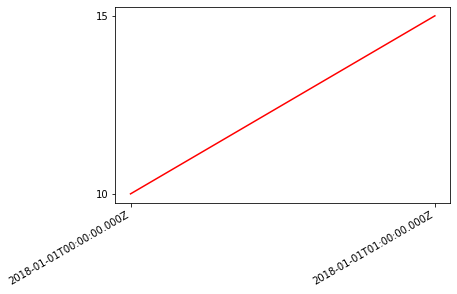

In [22]:
%%local
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(pdf['date'], pdf['pm2-5'], color='red')
plt.gcf().autofmt_xdate()
plt.show()